#  ANOVA + Find Important Features(random forest regressor) + Z-Score + PCA + tSNE + Classification + Ensemble + Prediction

Import Libraries

In [1008]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [1009]:
data = pd.read_csv("data.csv",header=None) 
label = pd.read_csv("labels.csv",header=None)

data = pd.concat([data,label], axis=1, sort=False, ignore_index=True)
data_available = data.dropna()
data_without_label = data[~data.isin(data_available)].dropna(thresh=100)
data_without_label[186].replace(np.nan, 0, inplace=True)
X = data_available.drop(186, 1)
Y = data_available[186]

W = data_without_label.drop(186, 1)
Z = data_without_label[186]

In [1010]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)
X_train = X
y_train = Y

## Feature Selection

### ANOVA

In [1011]:
# sel = f_classif(X_train_unique, y_train)
sel = f_classif(X_train, y_train)

In [1012]:
p_values = pd.Series(sel[1])
# p_values.index = X_train_unique.columns
p_values.index = X_train.columns
p_values.sort_values(ascending = True, inplace = True)

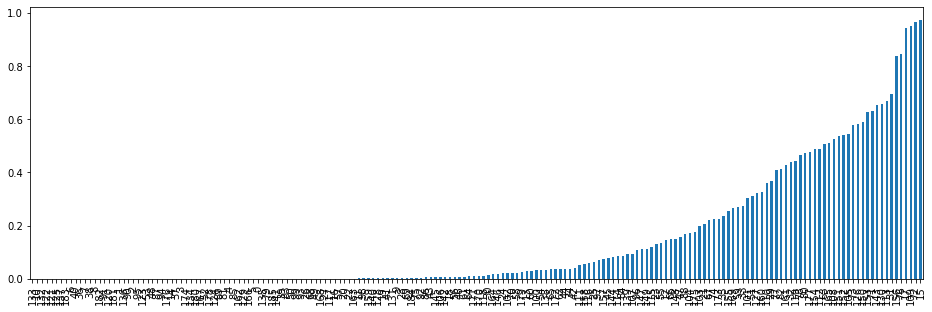

In [1013]:
p_values.plot.bar(figsize = (16, 5))

In [1014]:
p_values = p_values[p_values<0.05]

In [1015]:
print("Reduced to " + str(p_values.index.size) + " Features from " + str(X_train.shape[1]))

Reduced to 114 Features from 186


In [1016]:
X = pd.concat([X,W])
Y = pd.concat([Y,Z])

### Z-Score Transformation

In [1017]:
x = stats.zscore(X[p_values.index])
from sklearn.ensemble import RandomForestRegressor

## Select Important Feature using Random Forest regressor

[(0.2264, 133), (0.1164, 132), (0.1102, 125), (0.0804, 137), (0.072, 123), (0.0457, 176), (0.0332, 121), (0.0325, 1), (0.0306, 180), (0.0209, 120), (0.0193, 168), (0.0176, 14), (0.0175, 6), (0.0169, 181), (0.0162, 57), (0.0162, 8), (0.0103, 7), (0.0078, 10), (0.0076, 170), (0.0075, 159), (0.0071, 182), (0.0069, 172), (0.0066, 178), (0.006, 122), (0.0045, 183), (0.004, 174), (0.0038, 136), (0.0036, 90), (0.0036, 36), (0.0031, 141), (0.0031, 54), (0.0026, 162), (0.0024, 41), (0.0024, 11), (0.0023, 117), (0.0022, 167), (0.0019, 164), (0.0018, 75), (0.0014, 128), (0.0014, 79), (0.0013, 135), (0.0012, 4), (0.0011, 166), (0.0011, 163), (0.0011, 146), (0.0011, 138), (0.0011, 93), (0.0011, 37), (0.0009, 106), (0.0009, 70), (0.0009, 62), (0.0008, 56), (0.0008, 19), (0.0008, 16), (0.0007, 86), (0.0007, 69), (0.0007, 22), (0.0007, 5), (0.0006, 142), (0.0006, 61), (0.0006, 27), (0.0005, 129), (0.0005, 53), (0.0005, 30), (0.0004, 171), (0.0004, 134), (0.0004, 85), (0.0004, 20), (0.0004, 0), (0.0003

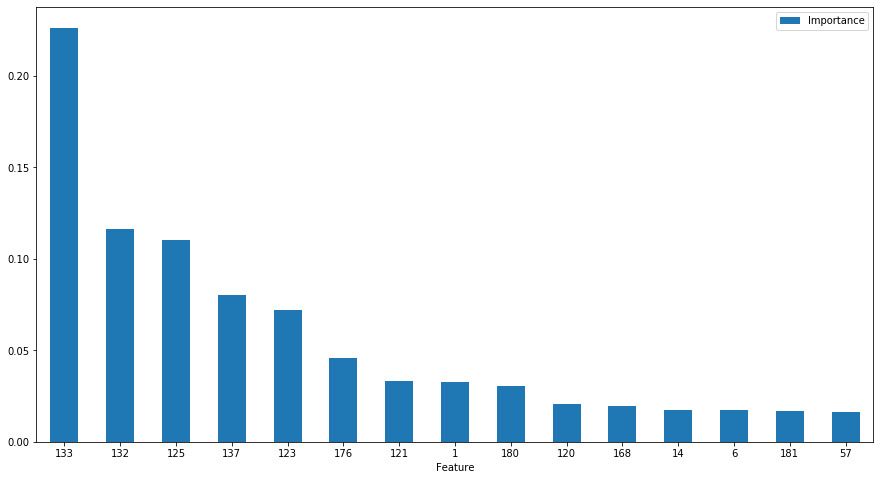

In [1018]:
def findFeatureImportance(trainX,trainY, featureNames,limit):
    rf = RandomForestRegressor(n_estimators=100, random_state=2)
    rf.fit(trainX,trainY)
    importance = rf.feature_importances_
    print(sorted(zip(map(lambda x: round(x,4), rf.feature_importances_), featureNames),reverse= True))
    features = featureNames
    res = pd.DataFrame(sorted(zip(map(lambda x: round(x,4), rf.feature_importances_),features),reverse = True), columns =["Importance","Feature"])[0:limit]
    res.plot.bar(x="Feature", y="Importance", rot=0)
    selFeatureRG=res
    return res

# featureNam = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
# ]
featureNam = p_values.index
# X_train_norm = stats.zscore(X_train)
X_train_norm = stats.zscore(X_train[p_values.index])
y_train_norm = y_train
# X_train_norm = stats.zscore(X_train)
# y_train_norm = y_train
selFeatureRG = findFeatureImportance(X_train_norm,y_train_norm,featureNam,15)

### PCA

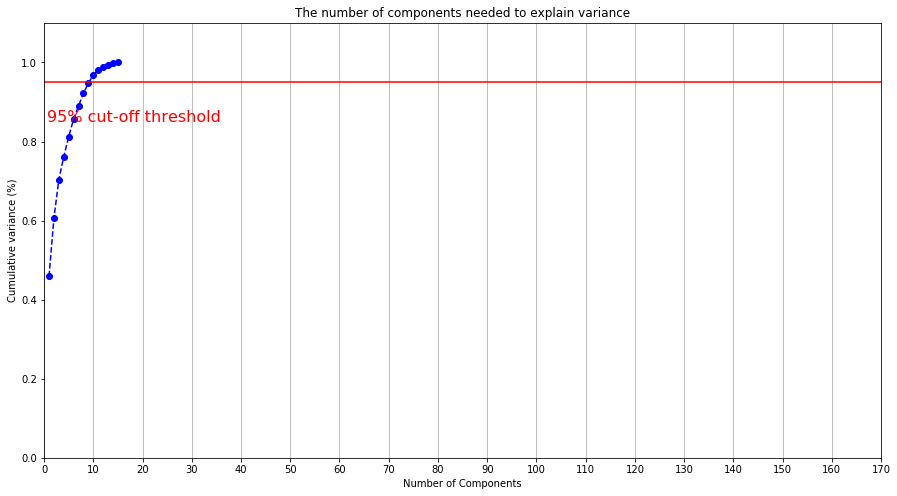

In [1019]:
sel_column = selFeatureRG['Feature']
# x = stats.zscore(X[sel_column])
x = stats.zscore(X[selFeatureRG['Feature']])

pca = PCA().fit(x)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

fig, ax = plt.subplots()
xi = np.arange(1, 15+1, step=1)
# xi = np.arange(1, 114, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 180, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [1020]:
n=10
pca = PCA(n_components=n,random_state=0)
T = pca.fit_transform(x)
principalComponents = T * (-1)
columns =[]

for i in range(n):
    columns.append('PC'+ str(i))

principalDataframe = pd.DataFrame(data = principalComponents, columns = columns)

In [1021]:
targetDataframe = Y
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [1022]:
pca.explained_variance_ratio_

array([0.45888495, 0.14699711, 0.09767131, 0.05818934, 0.05050999,
       0.04464509, 0.03318597, 0.03209164, 0.02546054, 0.02065657])

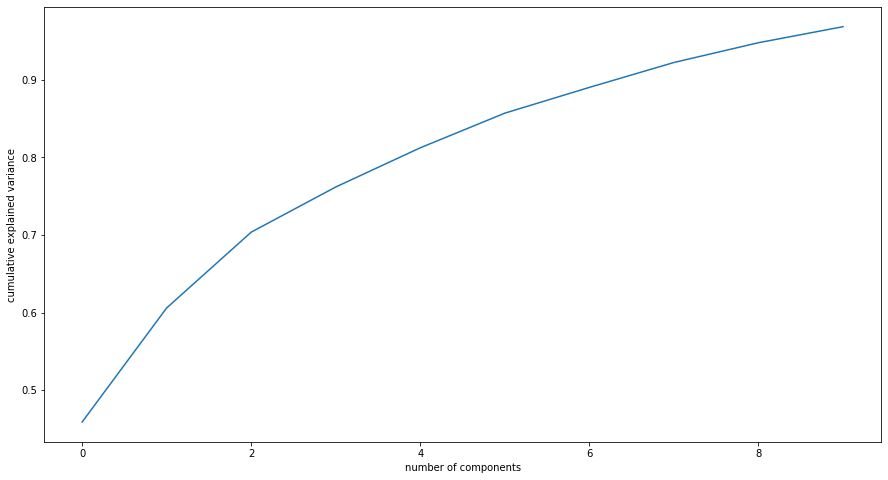

In [1023]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

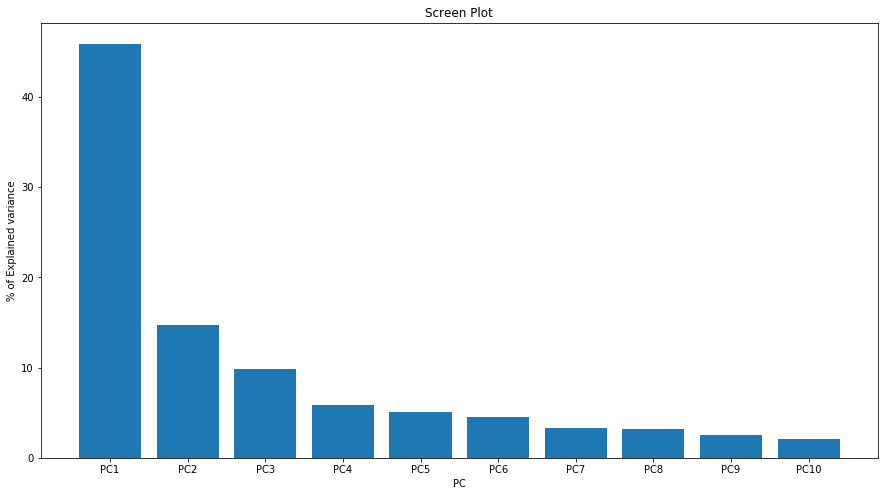

In [1024]:
per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height = per_var, tick_label= labels)
plt.ylabel('% of Explained variance')
plt.xlabel('PC')
plt.title('Screen Plot')
plt.show()

#### cumulative sum of variance explained with [n] features

In [1025]:
explained_variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(explained_variance, decimals=3)*100)
var

array([45.9, 60.6, 70.4, 76.2, 81.3, 85.8, 89.1, 92.3, 94.8, 96.9])

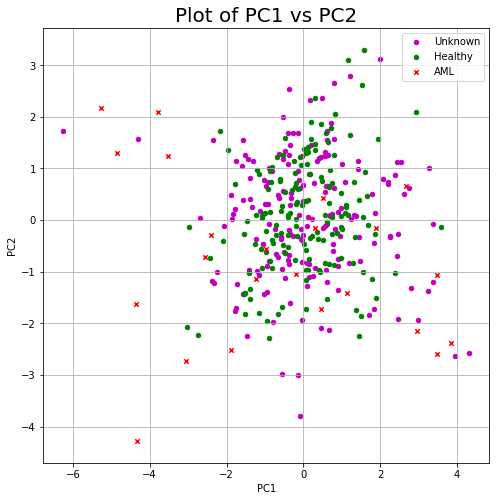

In [1026]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = newDataframe[186] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
                , marker=marker
               ,label=label
               , c = color
               , s = 20
              )
    
ax.legend(labels)
ax.grid()

In [1027]:
dataset = principalComponents
# principalDf = pd.DataFrame(data = dataset, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
columns2 =[]
for i in range(n):
    columns2.append('PC'+ str(i))
principalDf = pd.DataFrame(data = dataset, columns = columns2)

df1 = principalDf.transpose().reset_index(drop=True).transpose()
df2 = Y.transpose().reset_index(drop=True).transpose()

finalDf = pd.concat([df1, df2],axis=1,ignore_index=True)

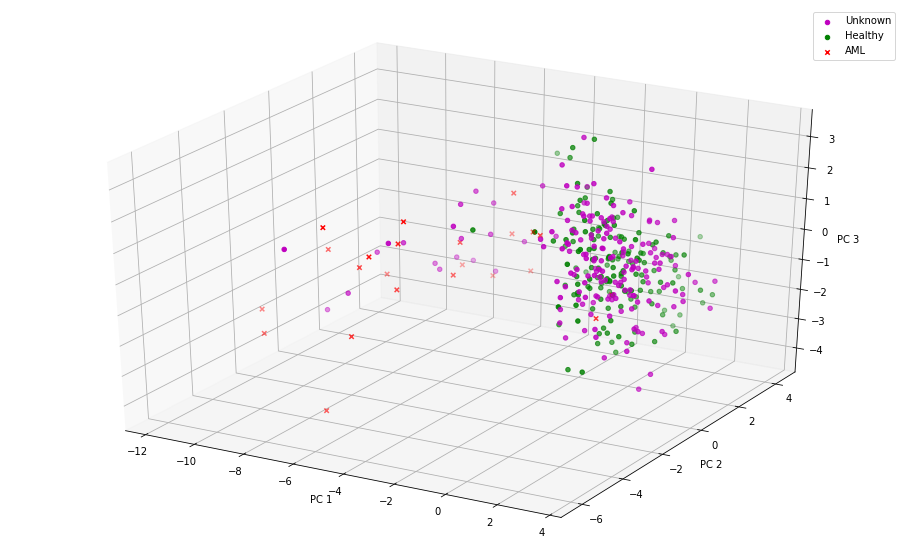

In [1028]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
indicesToKeep = finalDf[3]
targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[n] == target
    ax.scatter(
    xs=finalDf.loc[indicesToKeep, 0], 
    ys=finalDf.loc[indicesToKeep, 1], 
    zs=finalDf.loc[indicesToKeep, 2], 
    marker=marker
    ,label=label
    , c = color
    , s = 20
    ,cmap='tab10'
    )
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend(labels)
plt.show()

In [1029]:
load_scores = pd.Series(pca.components_[0])
sorted_loading_scores = load_scores.abs().sort_values(ascending = False)
top_10 = sorted_loading_scores[0:30].index.values
print(load_scores[top_10])

6    -0.333638
2    -0.329296
13   -0.314532
9    -0.311432
0     0.298541
1     0.287630
8    -0.281074
12   -0.267921
4     0.262590
3     0.257455
11    0.214890
5    -0.204162
7    -0.182709
14    0.059768
10    0.040455
dtype: float64


In [1030]:
pca_10 = PCA(n_components=10)
pca_result_10 = pca_10.fit_transform(x)
print('Cumulative explained variation for 10 principal components: {}'.format(np.sum(pca_10.explained_variance_ratio_)))

Cumulative explained variation for 10 principal components: 0.9682924900521378


### tSNE

In [1031]:
from __future__ import print_function
import time
from sklearn.manifold import TSNE

t-SNE done! Time elapsed: 0.99991774559021 seconds


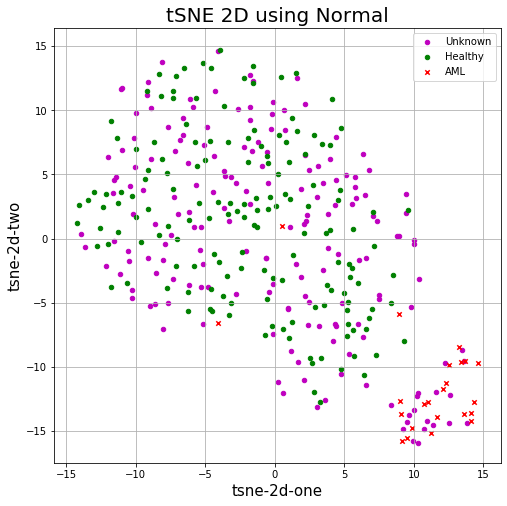

In [1032]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=600,random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_10)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
# metric='chebyshev'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('tSNE 2D using Normal', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[n] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
                ,marker=marker
                ,label=label
                , c = color
                , s = 20)

ax.legend(labels)
ax.grid()

t-SNE done! Time elapsed: 0.983999490737915 seconds


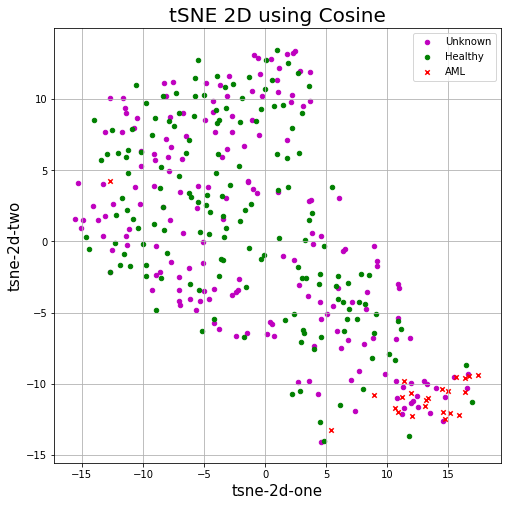

In [1033]:
time_start = time.time()
tsne = TSNE(n_components=2,metric="cosine",verbose=0, perplexity=40, n_iter=600,random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_10)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
# metric='chebyshev'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('tSNE 2D using Cosine', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']
for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[n] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
               ,marker=marker
                ,label=label
                , c = color
                , s = 20)
ax.legend(labels)
ax.grid()

In [1034]:
from sklearn import metrics
def RF(type):
    rf = RandomForestClassifier(n_jobs=2, random_state=0)
    rf.fit(X_train, y_train)
    RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                max_depth=None, max_features='auto', max_leaf_nodes=None,
                min_impurity_split=1e-07, min_samples_leaf=1,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                n_estimators=10, n_jobs=2, oob_score=False, random_state=8,
                verbose=0, warm_start=False)
    preds = rf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, preds))
    preds = rf.predict(patients_unlabelled)
    unique, counts = np.unique(preds, return_counts= True)
    print(dict(zip(unique,counts)))
    print("Healthy Patients:")
    for x,y in zip(patients_unlabelled.index, preds.data):
        if y == 1.0:
            if type == 1:
                print(x+1)
            else:
                print(x+180)

    print("Unhealthy Patients:")
    for x,y in zip(patients_unlabelled.index, preds.data):
        if y == 2.0:
            if type == 1:
                print(x+1)
            else:
                print(x+180)
    return;

### Decision Tree - ANOVA

In [1035]:
X = data_available.drop(186, 1)
Y = data_available[186]

W = data_without_label.drop(186, 1)
Z = data_without_label[186]

In [1036]:
patients_labelled = X[sel_column]
patients_unlabelled = W[sel_column]
patients_labelled_output = data_available[186]
X_train, X_test, y_train, y_test = train_test_split(patients_labelled, patients_labelled_output, test_size=0.3,random_state=7)

In [1037]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
def DT(type):
    clf = DecisionTreeClassifier(random_state=8)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of this classifier:",metrics.accuracy_score(y_test, y_pred))
    z_pred = clf.predict(patients_unlabelled)
    unique, counts = np.unique(z_pred, return_counts= True)
    print(dict(zip(unique,counts)))
    print("Healthy Patients:")
    for x,y in zip(patients_unlabelled.index, z_pred.data):
        if y == 1.0:
            if type == 1:
                print(x+1)
            else:
                print(x+180)

    print("Unhealthy Patients:")
    for x,y in zip(patients_unlabelled.index, z_pred.data):
        if y == 2.0:
            if type == 1:
                print(x+1)
            else:
                print(x+180)
#     pd.concat(patients_unlabelled,z_pred.data)
    return;

In [1038]:
DT(1)

Accuracy of this classifier: 0.9629629629629629
{1.0: 157, 2.0: 23}
Healthy Patients:
180
181
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
206
207
208
209
210
211
212
215
216
217
218
219
220
221
223
224
225
226
227
228
229
231
233
234
235
236
237
238
239
240
241
242
244
245
246
247
249
250
251
253
254
255
256
257
259
260
261
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
285
286
287
288
289
290
291
293
295
296
298
299
300
301
303
304
305
306
307
308
309
310
311
312
313
314
315
317
318
319
320
322
323
324
325
326
327
328
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
Unhealthy Patients:
182
183
205
213
214
222
230
232
243
248
252
258
262
264
282
284
292
294
297
302
316
321
329


### Decision Tree with ADA Boost Ensemble - ANOVA

In [1039]:
#Boosting - Ada Boost
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
def DTADA(type):
    adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 5, random_state=7)
    adb.fit(X_train,y_train)
    print("Accuracy of this classifier:",adb.score(X_test,y_test))
    z_pred  = adb.predict(patients_unlabelled)
    unique, counts = np.unique(z_pred, return_counts= True)
    print(dict(zip(unique,counts)))
    print("Healthy Patients:")
    for x,y in zip(patients_unlabelled.index, z_pred.data):
        if y == 1.0:
            if type == 1:
                print(x+1)
            else:
                print(x+180)

    print("Unhealthy Patients:")
    for x,y in zip(patients_unlabelled.index, z_pred.data):
        if y == 2.0:
            if type == 1:
                print(x+1)
            else:
                print(x+180)
    return;

In [1040]:
DTADA(1)

Accuracy of this classifier: 0.9444444444444444
{1.0: 162, 2.0: 18}
Healthy Patients:
180
181
182
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
231
233
234
235
236
237
238
239
240
241
242
244
245
246
247
249
250
251
253
254
255
256
257
259
260
261
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
285
286
287
288
289
290
291
293
294
295
296
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
317
318
319
320
322
323
324
325
326
327
328
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
Unhealthy Patients:
183
213
214
230
232
243
248
252
258
262
264
282
284
292
297
316
321
329


### Decision Tree with Bagging Ensemble - ANOVA

In [1041]:
def DTBAG(type):
    bg = BaggingClassifier(DecisionTreeClassifier() , n_estimators=80, random_state=7)
    bg.fit(X_train,y_train)
    print("Accuracy of this classifier:",bg.score(X_test,y_test))
    z_pred  = bg.predict(patients_unlabelled)
    unique, counts = np.unique(z_pred, return_counts= True)
    print(dict(zip(unique,counts)))
    print("Healthy Patients:")
    for x,y in zip(patients_unlabelled.index, z_pred.data):
        if y == 1.0:
            if type == 1:
                print(x+1)
            else:
                print(x+180)
                Z[x+179,186] = 1.0

    print("Unhealthy Patients:")
    for x,y in zip(patients_unlabelled.index, z_pred.data):
        if y == 2.0:
            if type == 1:
                print(x+1)
            else:
                print(x+180)
                Z[x+179,186] = 2.0
    return;

In [1042]:
DTBAG(1)

Accuracy of this classifier: 0.9629629629629629
{1.0: 161, 2.0: 19}
Healthy Patients:
180
181
182
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
231
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
250
251
254
255
256
257
259
260
261
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
286
287
288
289
290
291
293
294
295
296
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
317
318
319
320
322
323
324
325
326
327
328
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
Unhealthy Patients:
183
213
214
230
232
249
252
253
258
262
264
282
284
285
292
297
316
321
329


### Random Forest - ANOVA

In [1043]:
RF(1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9444444444444444
{1.0: 160, 2.0: 20}
Healthy Patients:
180
181
182
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
231
233
234
235
236
237
238
239
240
241
242
244
245
246
247
250
251
254
255
256
257
259
260
261
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
286
287
288
289
290
291
293
294
295
296
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
317
318
319
320
322
323
324
325
326
327
328
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
Unhealthy Patients:
183
213
230
232
243
248
249
252
253
258
262
264
282
284
285
292
297
316
321
329


### Decision Tree - ANOVA + PCA

In [1044]:
patients_labelled = pca_result_10[:179,:]
patients_labelled_output = data_available[186]
patients_unlabelled = pd.DataFrame(pca_result_10[179:,:])
X_train, X_test, y_train, y_test = train_test_split(patients_labelled, patients_labelled_output, test_size=0.3, random_state =6)

In [1045]:
DT(2)

Accuracy of this classifier: 0.9629629629629629
{1.0: 159, 2.0: 21}
Healthy Patients:
180
181
182
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
215
216
217
218
219
220
221
222
223
224
225
226
228
229
231
233
234
235
236
237
238
239
241
242
243
244
245
246
247
248
250
251
254
255
256
257
259
260
261
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
286
287
288
289
290
291
293
294
295
296
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
317
318
319
320
322
323
324
325
326
327
328
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
Unhealthy Patients:
183
213
214
227
230
232
240
249
252
253
258
262
264
282
284
285
292
297
316
321
329


### Decision Tree with ADA Boost Ensemble - ANOVA + PCA

In [1046]:
DTADA(2)

Accuracy of this classifier: 0.9629629629629629
{1.0: 159, 2.0: 21}
Healthy Patients:
180
181
182
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
215
216
217
218
219
220
221
222
223
224
225
226
228
229
231
233
234
235
236
237
238
239
241
242
243
244
245
246
247
248
250
251
254
255
256
257
259
260
261
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
286
287
288
289
290
291
293
294
295
296
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
317
318
319
320
322
323
324
325
326
327
328
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
Unhealthy Patients:
183
213
214
227
230
232
240
249
252
253
258
262
264
282
284
285
292
297
316
321
329


### Decision Tree with Bagging Ensemble - ANOVA +PCA

In [1047]:
DTBAG(2)

Accuracy of this classifier: 0.9629629629629629
{1.0: 160, 2.0: 20}
Healthy Patients:
180
181
182
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
215
216
217
218
219
220
221
222
223
224
225
226
228
229
231
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
250
251
254
255
256
257
259
260
261
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
286
287
288
289
290
291
293
294
295
296
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
317
318
319
320
322
323
324
325
326
327
328
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
Unhealthy Patients:
183
213
214
227
230
232
249
252
253
258
262
264
282
284
285
292
297
316
321
329


### Random Forest - ANOVA +PCA

In [1048]:
RF(2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9814814814814815
{1.0: 161, 2.0: 19}
Healthy Patients:
180
181
182
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
231
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
250
251
254
255
256
257
259
260
261
263
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
283
285
286
287
288
289
290
291
293
294
295
296
298
299
300
301
302
303
304
305
306
308
309
310
311
312
313
314
315
317
318
319
320
322
323
324
325
326
327
328
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
Unhealthy Patients:
183
213
214
230
232
249
252
253
258
262
264
282
284
292
297
307
316
321
329


In [1050]:
X = data_available.drop(186, 1)
Y = data_available[186]

W = data_without_label.drop(186, 1)
# Z = data_without_label[186]

In [1051]:
X = pd.concat([X,W])
Y = pd.concat([Y,Z])

In [1052]:
x = stats.zscore(X[p_values.index])

In [1053]:
pca = PCA().fit(x)

Cumulative explained variation for 10 principal components: 0.766632933546828
t-SNE done! Time elapsed: 1.062997579574585 seconds


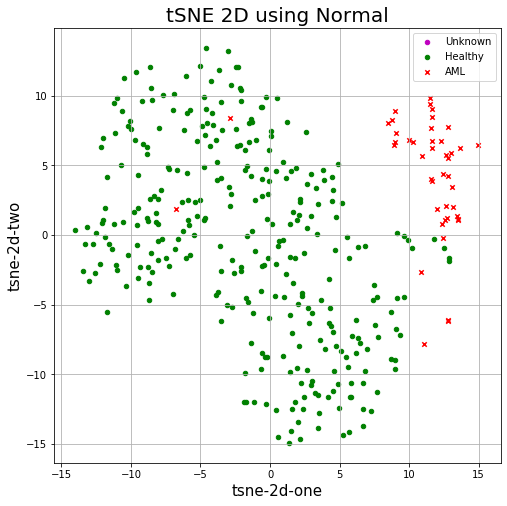

In [1054]:
dataset = principalComponents
# principalDf = pd.DataFrame(data = dataset, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
columns2 =[]
for i in range(n):
    columns2.append('PC'+ str(i))
principalDf = pd.DataFrame(data = dataset, columns = columns2)

df1 = principalDf.transpose().reset_index(drop=True).transpose()
df2 = Y.transpose().reset_index(drop=True).transpose()

finalDf = pd.concat([df1, df2],axis=1,ignore_index=True)
pca_10 = PCA(n_components=10)
pca_result_10 = pca_10.fit_transform(x)
print('Cumulative explained variation for 10 principal components: {}'.format(np.sum(pca_10.explained_variance_ratio_)))
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=600,random_state=0)
tsne_pca_results = tsne.fit_transform(pca_result_10)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
finalDf['tsne-2d-one'] = tsne_pca_results[:,0]
finalDf['tsne-2d-two'] = tsne_pca_results[:,1]
# metric='chebyshev'
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('tSNE 2D using Normal', fontsize = 20)

targets = [0, 1, 2]
colors = ['m', 'g', 'r']
markers = ['o','o','x']
labels = ['Unknown','Healthy','AML']

for target, color ,marker, label in zip(targets,colors,markers,labels):
    indicesToKeep = finalDf[n] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
                ,marker=marker
                ,label=label
                , c = color
                , s = 20)

ax.legend(labels)
ax.grid()